In [37]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [39]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [83]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.433511,1.088189,-2.021018,-1.015023,-1.900763,1
1,2.727649,0.333573,2.013820,-0.812252,1.471363,0
2,0.238813,-2.011906,0.369819,1.018131,-0.153962,0
3,1.380018,0.622255,0.233712,0.811805,-0.390012,1
4,2.223977,0.899329,0.088073,0.499003,-0.980494,1


In [85]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [87]:
# function for feature sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [89]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [91]:
df1 = combined_sampling(df,0.5,0.5)


C:\Users\HP\AppData\Local\Temp\ipykernel_15612\1367481554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [93]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_15612\1367481554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [126]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_15612\1367481554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [97]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
     

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')


In [136]:
df3

,col4,col5,target
83,1.504600,-0.162111,0
58,-0.947975,-0.706929,1
8,0.327237,-0.219919,1
77,0.080881,1.480766,0
29,-0.094670,0.802792,0
61,1.074202,3.089839,1
37,1.099182,0.849491,0
22,-1.772809,-0.208770,1
74,-1.699939,2.948047,0
92,2.082227,1.721802,0


In [101]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [103]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [105]:
from sklearn.tree import plot_tree


[Text(0.5, 0.875, 'x[0] <= -0.286\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2, 0.625, 'x[1] <= 2.307\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.35, 0.75, 'True  '),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.3, 0.375, 'x[1] <= 4.133\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'x[1] <= 0.111\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.65, 0.75, '  False'),
 Text(0.7, 0.375, 'x[1] <= 0.047\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

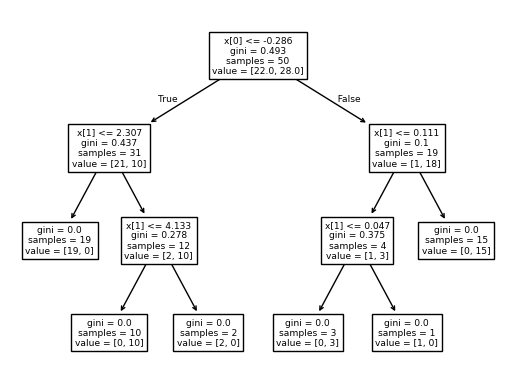

In [107]:
plot_tree(clf1)


[Text(0.6, 0.9, 'x[1] <= -0.257\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.4, 0.7, 'x[0] <= 3.695\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.5, 0.8, 'True  '),
 Text(0.3, 0.5, 'x[1] <= -2.294\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.2, 0.3, 'x[0] <= 1.897\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.7, 'x[1] <= 0.544\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.7, 0.8, '  False'),
 Text(0.7, 0.5, 'x[1] <= 0.302\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]')]

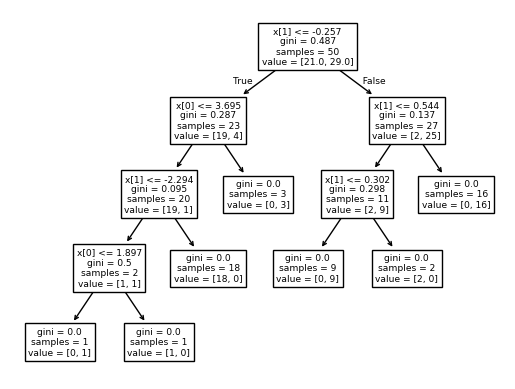

In [109]:
plot_tree(clf2)


[Text(0.5263157894736842, 0.9285714285714286, 'x[0] <= -0.261\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2631578947368421, 0.7857142857142857, 'x[1] <= 1.859\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.39473684210526316, 0.8571428571428572, 'True  '),
 Text(0.15789473684210525, 0.6428571428571429, 'x[0] <= -0.677\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.10526315789473684, 0.5, 'x[0] <= -1.051\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.05263157894736842, 0.35714285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.15789473684210525, 0.35714285714285715, 'x[0] <= -0.956\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.10526315789473684, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.21052631578947367, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3684210526315789, 0.6428571428571429, 'x[0] 

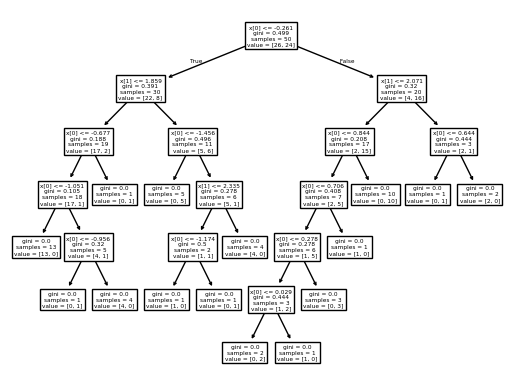

In [110]:
plot_tree(clf3)


In [128]:
clf1.predict(np.array([-1.035141,	0.413380]).reshape(1,2))


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [130]:
clf2.predict(np.array([-1.035141,	0.413380]).reshape(1,2))


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [132]:
clf3.predict(np.array([-1.035141,	0.413380]).reshape(1,2))


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])